## Testing the generated embeddings

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
# Load the saved embeddings
file_path = '/home/suraj/Data/Duke_WLOA_RL_Annotated/AMD/embeddings/Farsiu_Ophthalmology_2013_AMD_Subject_1001_embeddings.npy'
embeddings = np.load(file_path)

# 1. Check Shape
print("Embeddings shape:", embeddings.shape)
expected_shape = (100, 768)  # 100 B-scans, 768 dimensions for vit-base
if embeddings.shape == expected_shape:
    print("Shape is correct!")
else:
    print("Warning: Shape does not match expected (100, 768)")

Embeddings shape: (100, 768)
Shape is correct!


In [3]:
# 2. Inspect Values
print("Sample embedding (first B-scan):", embeddings[0][:10])  # Print first 10 values
min_val, max_val = np.min(embeddings), np.max(embeddings)
print(f"Range of values: [{min_val}, {max_val}]")

Sample embedding (first B-scan): [ 0.05836342  1.7034391   0.86345017  0.15533537  0.5259871  -0.13513438
 -0.83610606  0.6164175  -0.9527663  -0.55193377]
Range of values: [-4.12148904800415, 4.184910297393799]


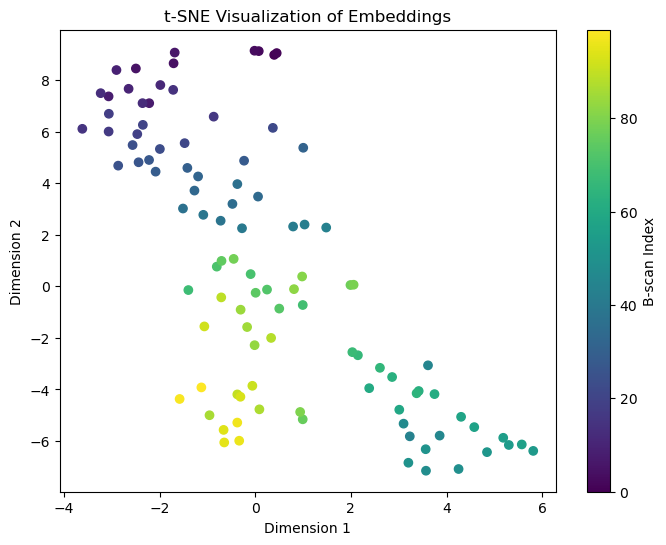

In [6]:
# 3. Visualize with t-SNE (reduce to 2D for plotting)
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=range(100), cmap='viridis')
plt.colorbar(label='B-scan Index')
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


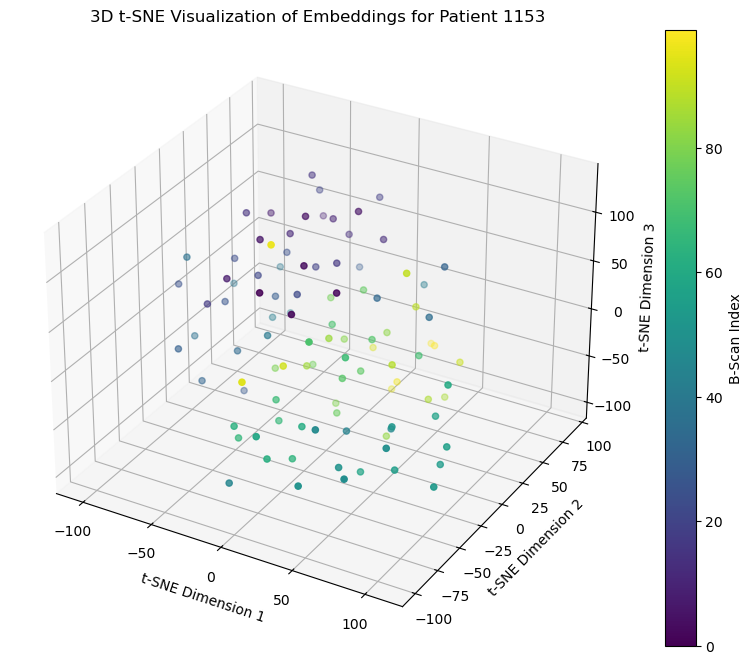

In [9]:
# 3D visualization 
from mpl_toolkits.mplot3d import Axes3D

tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=range(100), cmap='viridis')
plt.colorbar(scatter, label='B-Scan Index')
ax.set_title('3D t-SNE Visualization of Embeddings for Patient 1153')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()

In [ ]:
# Basic PCA for another view
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], c=range(100), cmap='viridis')
plt.colorbar(label='B-scan Index')
plt.title('PCA Visualization of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [7]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=range(100), cmap='viridis')
plt.colorbar(label='B-Scan Index')
plt.title('UMAP Visualization of Embeddings for Patient 1153')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

ModuleNotFoundError: No module named 'umap'

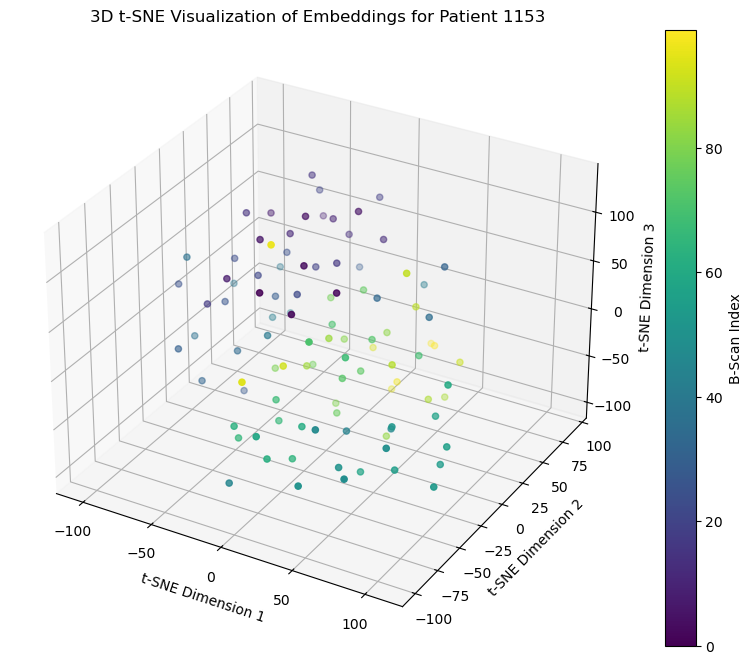

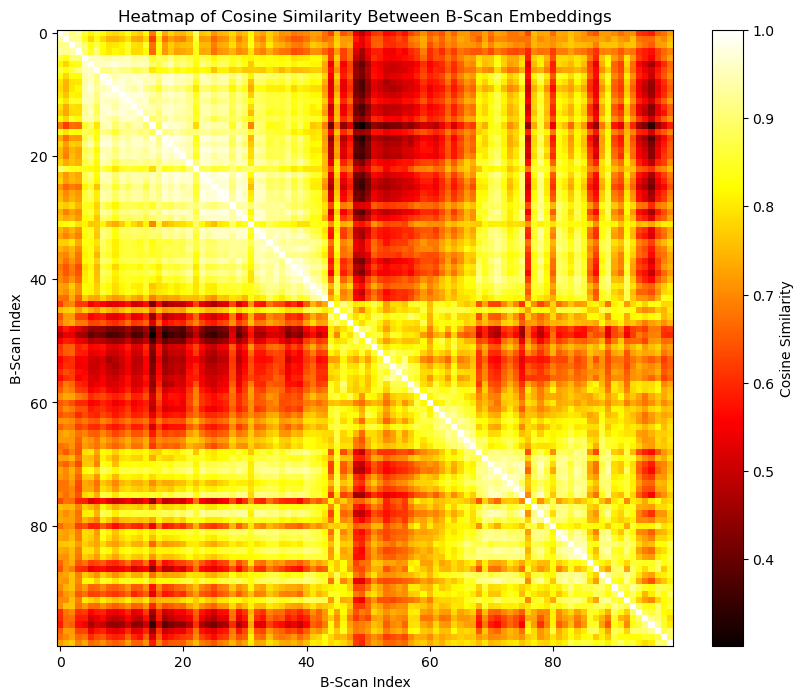

In [5]:
#Heap map of embedding similarities

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Heatmap of Cosine Similarity Between B-Scan Embeddings')
plt.xlabel('B-Scan Index')
plt.ylabel('B-Scan Index')
plt.show()